# ALGORITMO DA SELEÇÃO CLONAL PARA OTIMIZAR ROTEAMENTO DE TRANSPORTE DE HIDROGÊNIO VERDE

### TODOS OS DADOS SÃO FICTÍCIOS. O INTUITO É APENAS MOSTRAR A APLICABILIDADE DOS ALGORITMOS BIOINSPIRADOS.

### ESTE ALGORITMO IRÁ BUSCAR UMA SOLUÇÃO ÓTIMA PARA O ROTEAMENTO DE VEÍCULOS QUE DEVEM TRANSPORTAR HIDROGÊNIO VERDE.

### 15 PONTOS DE ENTREGA QUE DEVEM SER ATENDIDOS PELOS 4 VEÍCULOS DA DISTRIBUIDORA.

### O OBJETIVO FINAL É ACHAR UMA SOLUÇÃO EM QUE OS VEÍCULOS JUNTOS PERCORRAM A MENOR DISTÂNCIA POSSÍVEL, LEVANDO EM CONTA TAMBÉM O PERCURSO DE VOLTA DELES PARA A DISTRIBUIDORA.

Restrições:

- Cada ponto de entrega deve ser atendido exatamente uma vez (deve receber apenas um veículo).
    
- A soma das demandas dos clientes em qualquer rota não pode exceder a capacidade de cada veículo (100 kg).


Importante:
- A geração inicial é gerada de forma aleatória.
- A geração seguinte será composta pelos melhores indivíduos da geração anterior, pelos clones hipermutados desses indivíduos selecionados 
e por novos cromossomos gerados de forma aleatória.
- A hipermutação será mais aplicada nos clones de menores notas de avaliação.
- O ponto de distribuição 0 significa a distribuidora de hidrogênio.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import ast 
import seaborn as sns

In [2]:
# Tabela de demandas dos clientes
# 0 significa a distribuidora de hidrogênio.
demandas_data = {
    'Cliente': list(range(0, 16)),
    'Demanda (unidades)': [0, 15, 20, 25, 10, 15, 25, 15, 20, 10, 25, 10, 20, 15, 10, 20]
}
demandas = pd.DataFrame(demandas_data)

# Exibir a tabela de demandas
print("Tabela de Demandas:")
display(demandas)

# Matriz de distâncias

distances_data = [
    [0, 10, 20, 30, 25, 35, 40, 50, 45, 55, 60, 65, 70, 75, 80, 85],
    [10, 0, 15, 25, 20, 30, 35, 45, 40, 50, 55, 60, 65, 70, 75, 80],
    [20, 15, 0, 10, 5, 15, 20, 30, 25, 35, 40, 45, 50, 55, 60, 65],
    [30, 25, 10, 0, 10, 5, 15, 25, 20, 30, 35, 40, 45, 50, 55, 60],
    [25, 20, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35, 40, 45, 50],
    [35, 30, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35, 40, 45],
    [40, 35, 20, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35, 40],
    [50, 45, 30, 25, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35],
    [45, 40, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30],
    [55, 50, 35, 30, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25],
    [60, 55, 40, 35, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10, 20],
    [65, 60, 45, 40, 30, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10],
    [70, 65, 50, 45, 35, 30, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15],
    [75, 70, 55, 50, 40, 35, 30, 25, 20, 10, 15, 5, 10, 0, 10, 5],
    [80, 75, 60, 55, 45, 40, 35, 30, 25, 20, 10, 15, 5, 10, 0, 10],
    [85, 80, 65, 60, 50, 45, 40, 35, 30, 25, 20, 10, 15, 5, 10, 0]
]

# Criando um DataFrame para a matriz de distâncias
distances = pd.DataFrame(distances_data, columns=list(range(16)), index=list(range(16)))

# Exibir a matriz de distâncias
print("Matriz de Distâncias:")
display(distances)

Tabela de Demandas:


,Cliente,Demanda (unidades)
0,0,0
1,1,15
2,2,20
3,3,25
4,4,10
5,5,15
6,6,25
7,7,15
8,8,20
9,9,10


Matriz de Distâncias:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,10,20,30,25,35,40,50,45,55,60,65,70,75,80,85
1,10,0,15,25,20,30,35,45,40,50,55,60,65,70,75,80
2,20,15,0,10,5,15,20,30,25,35,40,45,50,55,60,65
3,30,25,10,0,10,5,15,25,20,30,35,40,45,50,55,60
4,25,20,5,10,0,10,5,15,10,20,25,30,35,40,45,50
5,35,30,15,5,10,0,10,5,15,10,20,25,30,35,40,45
6,40,35,20,15,5,10,0,10,5,15,10,20,25,30,35,40
7,50,45,30,25,15,5,10,0,10,5,15,10,20,25,30,35
8,45,40,25,20,10,15,5,10,0,10,5,15,10,20,25,30
9,55,50,35,30,20,10,15,5,10,0,10,5,15,10,20,25


Gera indivíduo

In [3]:
def cromossomo(tamanho_crom, tam_subgrupo):
   
        posicao = 0
        cromossomo = [0] * tamanho_crom
        clientes_possiveis = [i for i in range(tam_subgrupo)]
        for i in range(len(clientes_possiveis)):
            sorteio = random.random()
            if sorteio < 0.25:
                cromossomo[posicao] = 1
            elif sorteio < 0.5:
                cromossomo[posicao+16] = 1
            elif sorteio < 0.75:
                cromossomo[posicao+32] = 1
            else:
                cromossomo[posicao+48] = 1
            posicao += 1
        
        cromossomo[0] = cromossomo[16] = cromossomo[32] = cromossomo[48] = 1
        
        return cromossomo

In [4]:
print(cromossomo(64, 16))

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]


Gera população

In [5]:
def gerar_populacao(tamanho_pop, tamanho_crom, tam_subgrupo):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom, tam_subgrupo)
        populacao.append(crom)

    return populacao

In [6]:
print(gerar_populacao(10, 64, 16))

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 1, 1, 0, 1, 0, 0

Divide o cromossomo

In [7]:
def variaveis(cromossomo, tam_subgrupo): # Quebra o cromossomo em subgrupos do tamanho de tam_subgrupo
    subgrupos = []
    valor = []
    for i in range(1, len(cromossomo)+1):
        valor.append(cromossomo[i-1]) 
        if i % tam_subgrupo == 0:
            subgrupos.append(valor)
            valor = []

    return subgrupos



In [8]:
variaveis(cromossomo(64, 16), 16)

[[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]]

Procurar último 1 dentro de cada carro

In [9]:
def encontrar_ultimo_um(subgrupo):
    # Verificar se há mais de um '1' na lista
    if subgrupo.count(1) > 1:
        # Encontrar a posição do último '1'
        ultima_posicao_um = len(subgrupo) - 1 - subgrupo[::-1].index(1)
        return ultima_posicao_um
    else:
        return None  # Retorna None se não houver mais de um '1'

Fitness

In [10]:
def fitness(subgrupos):
    dist_total = 0
    espaco_ocupado = 0
    ultimo_k = 0
    
    # Verificar se apenas uma lista tem valor 1 na posição i
    for i, (a, b, c, d) in enumerate(zip(subgrupos[0], subgrupos[1], subgrupos[2], subgrupos[3])):
        num_ones = sum([a, b, c, d])  # Soma os valores na posição i de cada lista
        if i == 0:
            if num_ones != 4: # Todos os 4 carros devem partir da distribuidora
                dist_total = 800
                return dist_total
        
        if i != 0:
            if num_ones != 1:
                dist_total = 800
                return dist_total

    for subgrupo in subgrupos:
        i = 0
        for cliente in subgrupo:
            if cliente == 1:
                espaco_ocupado += demandas.iloc[i, 1]
            i += 1
        if espaco_ocupado > 100:
            dist_total = 800
            return dist_total
        espaco_ocupado = 0
    
    for subgrupo in subgrupos:
        for i in range(len(subgrupo) - 1):
            if subgrupo[i] == 1:
                for k in range(i + 1, len(subgrupo)):  # Começar de i+1 para evitar contar a mesma posição
                    if subgrupo[k] == 1:
                        dist_total += distances.iloc[i, k]
                        ultimo_k = k
                        break
            
        dist_total += distances.iloc[0, ultimo_k] # Considerando o percurso da volta até a distribuidora
    return dist_total


In [11]:
c = cromossomo(64, 16)
print(c)
subgrupos = variaveis(c, 16)
print(subgrupos)
fitness(subgrupos)

[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


560

LISTA DA NOTA COM O RESPECTIVO CROMOSSOMO

In [12]:
def afin_cromossomo(pop):
  afin_cromos = []
  for i in pop:
    afin_cromo = []
    subgrupos = variaveis(i, 16)
    afin_cromo.append(fitness(subgrupos))
    afin_cromo.append(i)
    afin_cromos.append(afin_cromo)
  return afin_cromos # Retorna afinidade e anticorpo para cada anticorpo

In [13]:
pop = gerar_populacao(25, 64, 16)
afin = afin_cromossomo(pop)
for i in afin:
  print(i)

[800, [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]
[575, [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]]
[575, [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]
[550, [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
[560, [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]]


SELEÇÃO DOS N MELHORES CROMOSSOMOS

In [14]:
def selec(afinidade,quantos):
  ordenados = sorted(afinidade) # Ordena de forma crescente
  melhores = ordenados[:quantos] # ESCOLHENDO OS MELHORES
  return melhores

In [15]:
pop = gerar_populacao(10, 64, 16)
afin = afin_cromossomo(pop)
sel = selec(afin,3) # Escolhendo os 3 melhores
for i in sel:
  print(i)

print()

for i in afin:
  print(i)

[560, [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]
[590, [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]
[590, [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]]

[600, [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]]
[620, [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

CLONAGEM DOS MELHORES ANTICORPOS

In [16]:
def clonagem(clonagem, melhores):
    clones = []
    afinidades = [x[0] for x in melhores]  # Coleta as notas dos cromossomos que serão clonados
    soma = sum(afinidades)
    anti = [x[1] for x in melhores]  # Coleta os cromossomos que serão clonados
    
    # Calcula o inverso das afinidades
    inverso_afinidades = [1 / c if c != 0 else 0 for c in afinidades]
    soma_inversos = sum(inverso_afinidades)
    
    # Calcula a quantidade de clones baseada nos inversos das afinidades
    clonagens = [round((c / soma_inversos) * clonagem) for c in inverso_afinidades]

    cont = 0
    while cont < len(clonagens):
        for i in range(clonagens[cont]):
            dupla = []
            dupla.append(afinidades[cont])
            dupla.append(anti[cont])
            clones.append(dupla)
        cont += 1

    return clones  # Retornando os clones dos escolhidos

In [17]:
pop = gerar_populacao(10, 64, 16)
afin = afin_cromossomo(pop)
sel = selec(afin,3) # Escolhendo os 3 melhores
clonados = clonagem(12,sel) # Clones dos escolhidos

for i in clonados:
  print(i[1])
print()
for i in afin:
  print(i)
print()
print(len(clonados))

[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0

HIPERMUTAÇÃO

In [18]:
def hipermutacao(clones, fator):
    hipermutados = []
    notas = [x[0] for x in clones]
    clones = [x[1] for x in clones]  # Coletando os cromossomos
    cont = 0
    for i in clones:
        aff = notas[cont]
        # Modificando a taxaHip para que menores valores de aff resultem em menores taxas de mutação
        taxaHip = (aff / 800) * fator
        hipermutado = []
        for j in i:
            rand = random.random()
            if rand <= taxaHip:
                if j == 0:
                    hipermutado.append(1)
                elif j == 1:
                    hipermutado.append(0)
            else:
                hipermutado.append(j)
        
        hipermutado[0] = hipermutado[16] = hipermutado[32] = hipermutado[48] = 1
        hipermutados.append(hipermutado)
        cont += 1
    return hipermutados


In [19]:
pop = gerar_populacao(10, 64, 16)
afin = afin_cromossomo(pop)
sel = selec(afin,3) # Escolhendo os 3 melhores
clonados = clonagem(12,sel) # Clones dos escolhidos

for i in clonados:
  print(i)
print()

for i in hipermutacao(clonados,0.25): # Hipermutando os clones
  print(i)

[505, [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[505, [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[505, [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[505, [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[520, [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]


EXECUÇÃO DO ALGORITMO

In [20]:
pop = gerar_populacao(100, 64, 16)
melhores = []

for i in range(100): # Gerações
  afinidades = afin_cromossomo(pop)
  bests = selec(afinidades,4) # Selecionando os 4 melhores

  melhor = bests[0]
  melhores.append(melhor)

  clon = clonagem(30,bests) # Criando os clones
  hipermut = hipermutacao(clon,0.25) # Hipermutando os clones. Os melhores da geração anterior são descartados. Como a taxa é bem baixa, os melhores serão pouco mudados.
  
  elite = [cromossomo for notas, cromossomo in bests]
  
  for i in range(len(elite)): # Os melhores da geração atual irão passar para a próxima geração sem sofrerem mutações
    hipermut.append(elite[i]) 
  
  nNovos = len(pop) - len(hipermut)
  for i in range(nNovos): # Criando novos anticorpos
    hipermut.append(cromossomo(64, 16))

  pop = hipermut # Nova pop já com os hipermutados e os novos


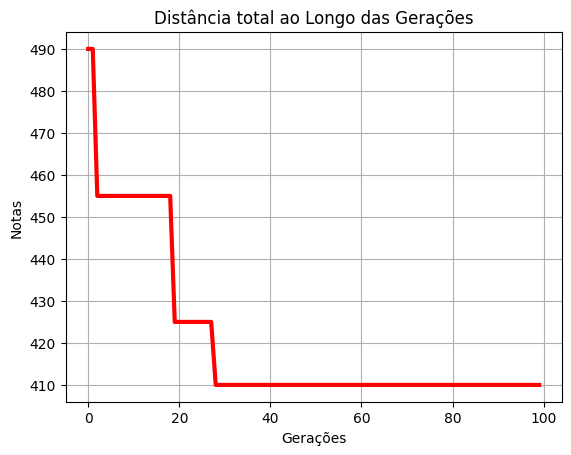

In [21]:
# Extração dos valores de lucro dos melhores cromossomos
notas = [notas for notas, cromossomo in melhores]

# Criação do gráfico de linhas
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

#plt.figure(figsize=(5,4))
plt.plot(notas, color='red', linewidth=3)
plt.title('Distância total ao Longo das Gerações')
plt.xlabel('Gerações')
plt.ylabel('Notas')
plt.grid(True)
plt.show()

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [23]:
minimo = min(melhores)
min_nota = minimo[0]
print(min_nota)
min_crom = minimo[1]



410


In [24]:
# Supondo que variaveis(min_crom, 16) retorna 4 listas de bits
p1, p2, p3, p4 = variaveis(min_crom, 16)

print(p1)
print(p2)
print(p3)
print(p4)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]


In [25]:
def visualiza_roteamento(subgrupos):
    i = 1
    print('**************** MELHOR ROTEAMENTO ****************')
    for subgrupo in subgrupos:
        veiculo = []
        for indice, bit in enumerate(subgrupo):
            if indice != 0:
                if bit == 1:
                    veiculo.append(indice)
        # Convertendo cada elemento da lista para string e unindo-os com vírgulas
        resultado = ', '.join(map(str, veiculo))
        print(f'Veículo {i}: {resultado}')
        i+=1

In [26]:
visualiza_roteamento(variaveis(min_crom, 16))

**************** MELHOR ROTEAMENTO ****************
Veículo 1: 
Veículo 2: 4, 8, 10, 13, 15
Veículo 3: 2, 3, 5, 6, 7
Veículo 4: 1, 9, 11, 12, 14


In [27]:
# Carregar o arquivo CSV para um DataFrame
df = pd.read_csv('melhores_resultados.csv')

# Adicionar os novos valores como uma nova linha ao final do DataFrame
df.loc[len(df)] = minimo

df.to_csv('melhores_resultados.csv', index=False)